In [6]:
import pandas as pd

dataframe = pd.read_csv('Data\mobile_addiction_modified.csv')

dataframe.shape

(13589, 12)

In [7]:


dataframe.describe()


,Unnamed: 0,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,Addiction Score
count,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.00000,13589.000000,13589.000000,13589.000000
mean,6794.000000,3.768121,30.037604,1.545956,1.034219,60.015306,0.990213,33.055707,5.97807,4.265288,27.532048,52.998189
std,3922.950739,1.897280,7.406585,1.204830,0.993172,12.732064,0.946606,10.118145,2.07139,2.288454,5.894790,17.330196
min,0.000000,0.000000,8.000000,0.000000,0.000000,25.000000,0.000000,15.000000,0.00000,0.000000,10.000000,10.692000
25%,3397.000000,2.000000,25.000000,1.000000,0.000000,50.000000,0.000000,25.000000,5.00000,3.000000,23.000000,38.016000
50%,6794.000000,4.000000,30.000000,1.000000,1.000000,59.000000,1.000000,33.000000,6.00000,4.000000,27.000000,52.635000
75%,10191.000000,5.000000,35.000000,2.000000,2.000000,70.000000,2.000000,41.000000,7.00000,6.000000,31.000000,67.749000
max,13588.000000,12.000000,60.000000,7.000000,6.000000,103.000000,6.000000,55.000000,14.00000,10.000000,55.000000,100.122000


In [8]:

dataframe.info()

non_numeric = dataframe.select_dtypes(exclude='number')

for col in non_numeric.columns:
    print(non_numeric[col].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          13589 non-null  int64  
 1   daily_screen_time   13589 non-null  int64  
 2   app_sessions        13589 non-null  int64  
 3   social_media_usage  13589 non-null  int64  
 4   gaming_time         13589 non-null  int64  
 5   notifications       13589 non-null  int64  
 6   night_usage         13589 non-null  int64  
 7   age                 13589 non-null  int64  
 8   work_study_hours    13589 non-null  int64  
 9   stress_level        13589 non-null  int64  
 10  apps_installed      13589 non-null  int64  
 11  Addiction Score     13589 non-null  float64
dtypes: float64(1), int64(11)
memory usage: 1.2 MB


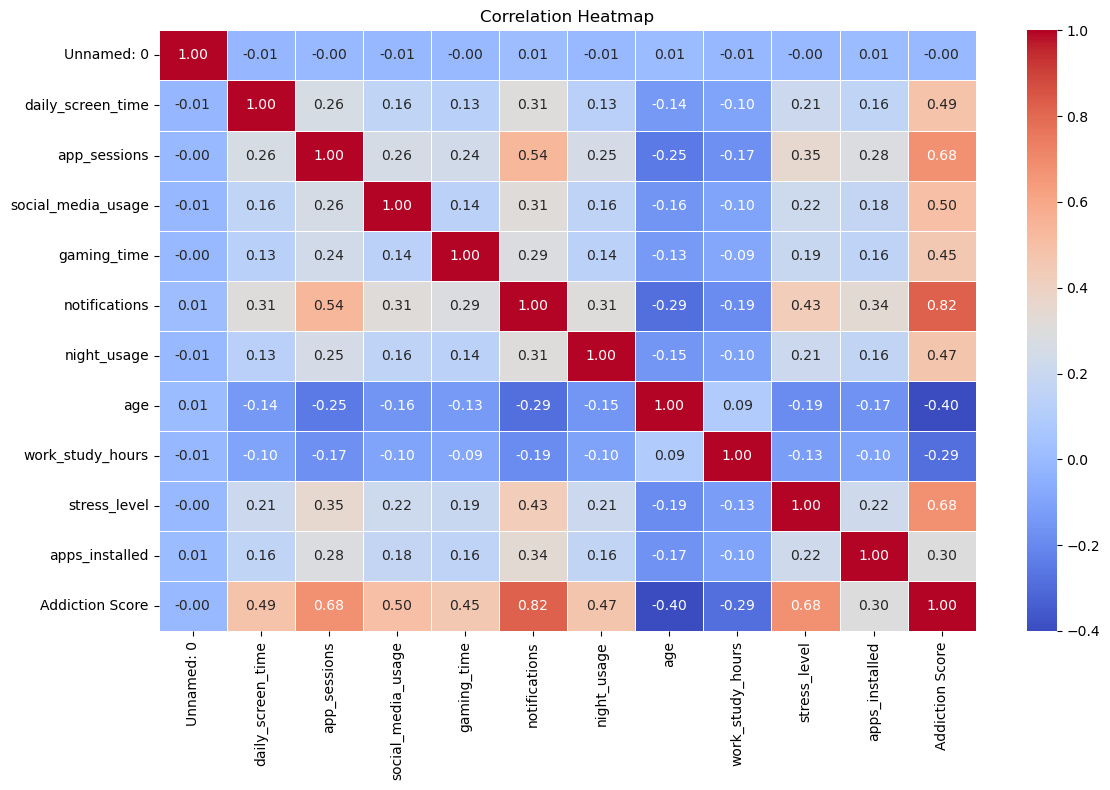

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = dataframe.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('Data/mobile_addiction_modified.csv')

# Drop unwanted columns
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Separate features and target
X = df.drop(columns=['Addiction Score'])
y = df['Addiction Score'].values

# Add bias (intercept) term
X = np.hstack([np.ones((X.shape[0], 1)), X.values])

# OLS weights: w = (XᵀX)^-1 Xᵀy
w_ols = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred_ols = X @ w_ols

# Ridge weights (with alpha = 10, no regularization on intercept)
alpha = 10
I = np.eye(X.shape[1])
I[0, 0] = 0  # Don't regularize intercept
w_ridge = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
y_pred_ridge = X @ w_ridge

# Metrics
def get_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mse, rmse, mae, r2

# Print results
print("OLS Weights:", w_ols)
mse, rmse, mae, r2 = get_metrics(y, y_pred_ols)
print(f"OLS -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

print("\nRidge Weights (alpha=10):", w_ridge)
mse, rmse, mae, r2 = get_metrics(y, y_pred_ridge)
print(f"Ridge -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


OLS Weights: [ 1.6586732e-13  1.6500000e+00  4.2900000e-01  2.6400000e+00
  2.9700000e+00  4.9500000e-01  2.9700000e+00 -1.6500000e-01
 -6.6000000e-01  2.3100000e+00 -2.3100000e-01]
OLS -> MSE: 0.0000, RMSE: 0.0000, MAE: 0.0000, R2: 1.0000

Ridge Weights (alpha=10): [-2.58604926e-03  1.64975095e+00  4.29101152e-01  2.63871325e+00
  2.96775782e+00  4.95118697e-01  2.96749721e+00 -1.65034324e-01
 -6.59984914e-01  2.30980015e+00 -2.30925694e-01]
Ridge -> MSE: 0.0000, RMSE: 0.0037, MAE: 0.0029, R2: 1.0000
